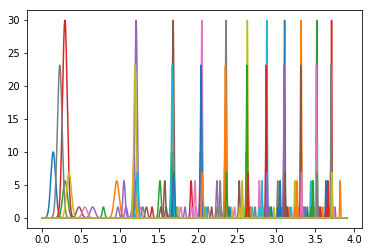

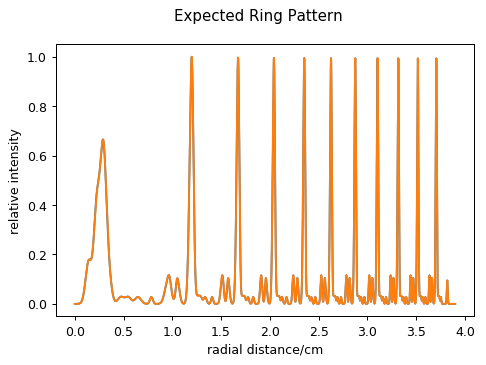

In [6]:
import numpy as np
import matplotlib.pyplot as plt

radii = np.genfromtxt(r'C:\ANACONDA3\Documents\ringdata.csv', delimiter=',')
    #column data corresponds to specific lines and rows correspond to the spectral order, starting at 14652
stdev = np.array([0.030373537,0.014824583,0.010519894,0.008599301,0.007451233,0.006666564,0.006086779,0.005635859,0.005272191,0.004970835,0.004715809])
amplitude = np.array([9.985,5.631666667,1.6525,5.631666667,29.945,5.631666667,1.6525,1.6525,1.6525,1.6525,1.6525,1.6525,1.6525,23.135,6.88])

def gaussian(r, mu, sig, amp):
    return amp*(np.exp(-(r-mu)**2/ (2 * (sig)**2)))

range_min = 0
range_max = 3.9
r = np.arange(range_min, range_max, 0.00001)
r_gauss = np.arange(-1,1,0.00001)
total = 0

for i in range(0, np.size(radii,1)):
    #if radii[0,i] != 0:   #0 values must be excluded because they are used as placeholders for invalid datapoints
        for j in range(0, np.size(radii,0)):
            if radii[j,i] != 0:
                plt.plot(r, gaussian(r, radii[j,i], stdev[j], amplitude[i]))
                total += gaussian(r, radii[j,i], stdev[j], amplitude[i])

total = total/np.max(total)

fibre = gaussian(r_gauss,0,1e-4,0.05)
fibre = fibre/np.max(fibre)

conv = np.convolve(total,fibre,mode='same')
conv /= np.max(conv)

fig = plt.figure(figsize = (6,4), dpi = 90)
plt.plot(r,total)
plt.plot(r,conv)
plt.ylabel('relative intensity')
plt.xlabel('radial distance/cm')
plt.suptitle('Expected Ring Pattern')

radii_measured = np.genfromtxt(r'C:\ANACONDA3\Documents\ringdata_measured.csv', delimiter=',')
#for i in range(0,np.size(radii_measured,1)):
#    for j in range(0,np.size(radii_measured,0)):
#        if ((radii_measured[j,i] != 0) & (radii_measured[j,i] > range_min) & (radii_measured[j,i] < range_max)):
#            if j == 0:
#                plt.plot(radii_measured[j,i],0,'rx')
#            if j == 1:
#                plt.plot(radii_measured[j,i],0,'bx')
#            if j == 2:
#                plt.plot(radii_measured[j,i],0,'gx')
#plt.figure(figsize = (6,4), dpi= 90)
#plt.plot(r_gauss, fibre)

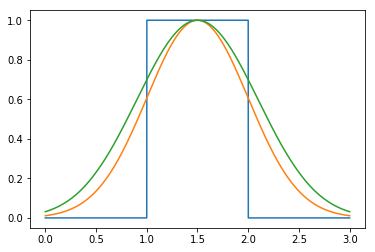

In [5]:
x = np.arange(0,3,0.00001)
y = np.empty(300000,dtype=int)
for i in range(100000,200000):
    y[i] = 1
plt.plot(x,y)
#plt.plot(x,np.convolve(y,fibre,mode='same'))
z = gaussian(x,1.5,0.5,1)
plt.plot(x,z)
plt.plot(x,np.convolve(y,z,mode='same')/np.max(np.convolve(y,z,mode='same')))